<a href="https://colab.research.google.com/github/JibrilMamo/AI_ChatBox_Chrome_Ext/blob/main/PyTorch_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab

# Tutorial compiled from
# https://pytorch.org/tutorials/index.html

%matplotlib inline

Tensors
=======

Tensors are a specialized data structure that are very similar to arrays
and matrices. In PyTorch, we use tensors to encode the inputs and
outputs of a model, as well as the model's parameters.

Tensors are similar to [NumPy's](https://numpy.org/) ndarrays, except
that tensors can run on GPUs or other hardware accelerators. In fact,
tensors and NumPy arrays can often share the same underlying memory,
eliminating the need to copy data (see
`bridge-to-np-label`{.interpreted-text role="ref"}). Tensors are also
optimized for automatic differentiation (we\'ll see more about that
later in the [Autograd](autogradqs_tutorial.html) section). If you're
familiar with ndarrays, you'll be right at home with the Tensor API. If
not, follow along!


In [ ]:
import torch
import numpy as np

Initializing a Tensor
=====================
**Directly from data**

Tensors can be created directly from data.

In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(data)
print(x_data)


[[1, 2], [3, 4]]
tensor([[1, 2],
        [3, 4]])


**From a NumPy array**

Tensors can be created from NumPy arrays (and vice versa - see
`bridge-to-np-label`).


In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(np_array)
print(x_np)

[[1 2]
 [3 4]]
tensor([[1, 2],
        [3, 4]])


**From another tensor:**

The new tensor retains the properties (shape, datatype) of the argument
tensor, unless explicitly overridden.


In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

rand_int = torch.randint_like(x_data, low=0, high=10)
print(f"Random Tensor of int: \n {rand_int} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.6755, 0.9889],
        [0.6761, 0.0115]]) 

Random Tensor of Int: 
 tensor([[7, 3],
        [2, 3]]) 



**With random or constant values:**

`shape` is a tuple of tensor dimensions. In the functions below, it
determines the dimensionality of the output tensor.


In [ ]:
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.2050, 0.9400, 0.5668],
        [0.4183, 0.8098, 0.0383]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


------------------------------------------------------------------------


Attributes of a Tensor
======================

Tensor attributes describe their shape, datatype, and the device on
which they are stored.


In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


------------------------------------------------------------------------


Operations on Tensors
=====================

Over 1200 tensor operations, including arithmetic, linear algebra,
matrix manipulation (transposing, indexing, slicing), sampling and more
are comprehensively described
[here](https://pytorch.org/docs/stable/torch.html).

Each of these operations can be run on the CPU and
[Accelerator](https://pytorch.org/docs/stable/torch.html#accelerators)
such as CUDA, MPS, MTIA, or XPU. If you're using Colab, allocate an
accelerator by going to Runtime \> Change runtime type \> GPU.

By default, tensors are created on the CPU. We need to explicitly move
tensors to the accelerator using `.to` method (after checking for
accelerator availability). Keep in mind that copying large tensors
across devices can be expensive in terms of time and memory!


**Standard numpy-like indexing and slicing:**


In [ ]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Joining tensors** You can use `torch.cat` to concatenate a sequence of
tensors along a given dimension. See also
[torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html),
another tensor joining operator that is subtly different from
`torch.cat`.


In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Arithmetic operations**


In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T,out = y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.mul(tensor, tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Single-element tensors** If you have a one-element tensor, for example
by aggregating all values of a tensor into one value, you can convert it
to a Python numerical value using `item()`:


In [ ]:
agg = tensor.sum()
agg_item = agg.item()
print(agg, type(agg))
print(agg_item, type(agg_item))

tensor(12.) <class 'torch.Tensor'>
12.0 <class 'float'>


**In-place operations** Operations that store the result into the
operand are called in-place. They are denoted by a `_` suffix. For
example: `x.copy_(y)`, `x.t_()`, will change `x`.


In [ ]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>

<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">

<p>In-place operations save some memory, but can be problematic when computing derivatives because of an immediate lossof history. Hence, their use is discouraged.</p>

</div>



------------------------------------------------------------------------


Bridge with NumPy {#bridge-to-np-label}
=================

Tensors on the CPU and NumPy arrays can share their underlying memory
locations, and changing one will change the other.


Tensor to NumPy array
=====================


In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


A change in the tensor reflects in the NumPy array.


In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


NumPy array to Tensor
=====================


In [ ]:
n = np.ones(5)
t = torch.from_numpy(n)

Changes in the NumPy array reflects in the tensor.


In [ ]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]



Datasets & DataLoaders
======================


Code for processing data samples can get messy and hard to maintain; we
ideally want our dataset code to be decoupled from our model training
code for better readability and modularity. PyTorch provides two data
primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset`
that allow you to use pre-loaded datasets as well as your own data.
`Dataset` stores the samples and their corresponding labels, and
`DataLoader` wraps an iterable around the `Dataset` to enable easy
access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such
as FashionMNIST) that subclass `torch.utils.data.Dataset` and implement
functions specific to the particular data. They can be used to prototype
and benchmark your model. You can find them here: [Image
Datasets](https://pytorch.org/vision/stable/datasets.html), [Text
Datasets](https://pytorch.org/text/stable/datasets.html), and [Audio
Datasets](https://pytorch.org/audio/stable/datasets.html)


Loading a Dataset
=================

Here is an example of how to load the
[Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/)
dataset from TorchVision. Fashion-MNIST is a dataset of Zalando's
article images consisting of 60,000 training examples and 10,000 test
examples. Each example comprises a 28×28 grayscale image and an
associated label from one of 10 classes.

We load the [FashionMNIST Dataset](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) with the following parameters:

:   -   `root` is the path where the train/test data is stored,
    -   `train` specifies training or test dataset,
    -   `download=True` downloads the data from the internet if it\'s
        not available at `root`.
    -   `transform` and `target_transform` specify the feature and label
        transformations


In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.9MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 308kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.56MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 15.1MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Iterating and Visualizing the Dataset
=====================================

We can index `Datasets` manually like a list: `training_data[index]`. We
use `matplotlib` to visualize some samples in our training data.


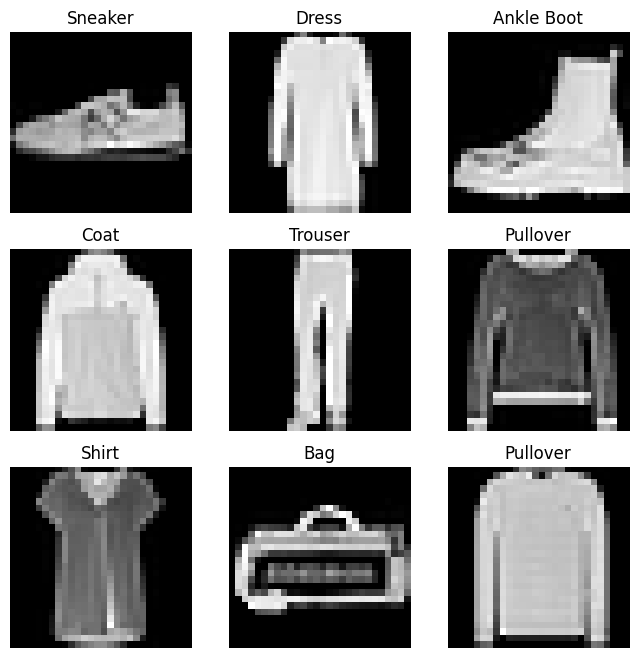

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # size must be a tuple of ints
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

------------------------------------------------------------------------


Creating a Custom Dataset for your files
========================================

A custom Dataset class must implement three functions:
[\_\_init\_\_]{.title-ref}, [\_\_len\_\_]{.title-ref}, and
[\_\_getitem\_\_]{.title-ref}. Take a look at this implementation; the
FashionMNIST images are stored in a directory `img_dir`, and their
labels are stored separately in a CSV file `annotations_file`.

In the next sections, we\'ll break down what\'s happening in each of
these functions.


In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

`__init__`
==========

The \_\_[init](#init__) function is run once when instantiating the
Dataset object. We initialize the directory containing the images, the
annotations file, and both transforms (covered in more detail in the
next section).

The labels.csv file looks like: :

    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9


In [ ]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

`__len__`
=========

The \_\_[len](#len__) function returns the number of samples in our
dataset.

Example:


In [ ]:
def __len__(self):
    return len(self.img_labels)

`__getitem__`
=============

The \_\_[getitem](#getitem__) function loads and returns a sample from
the dataset at the given index `idx`. Based on the index, it identifies
the image\'s location on disk, converts that to a tensor using
`read_image`, retrieves the corresponding label from the csv data in
`self.img_labels`, calls the transform functions on them (if
applicable), and returns the tensor image and corresponding label in a
tuple.


In [ ]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

------------------------------------------------------------------------


Preparing your data for training with DataLoaders
=================================================

The `Dataset` retrieves our dataset\'s features and labels one sample at
a time. While training a model, we typically want to pass samples in
\"minibatches\", reshuffle the data at every epoch to reduce model
overfitting, and use Python\'s `multiprocessing` to speed up data
retrieval.

`DataLoader` is an iterable that abstracts this complexity for us in an
easy API.


In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Iterate through the DataLoader
==============================

We have loaded that dataset into the `DataLoader` and can iterate
through the dataset as needed. Each iteration below returns a batch of
`train_features` and `train_labels` (containing `batch_size=64` features
and labels respectively). Because we specified `shuffle=True`, after we
iterate over all batches the data is shuffled (for finer-grained control
over the data loading order, take a look at
[Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)).


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


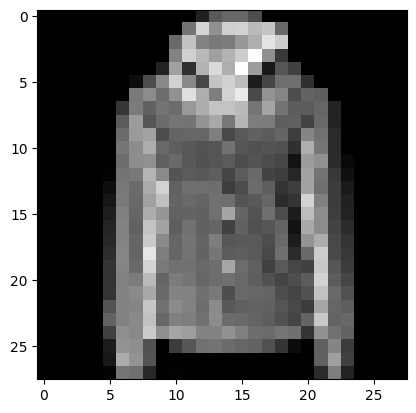

Label: 4


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

------------------------------------------------------------------------


Build the Neural Network
========================

Neural networks comprise of layers/modules that perform operations on
data. The [torch.nn](https://pytorch.org/docs/stable/nn.html) namespace
provides all the building blocks you need to build your own neural
network. Every module in PyTorch subclasses the
[nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html).
A neural network is a module itself that consists of other modules
(layers). This nested structure allows for building and managing complex
architectures easily.

In the following sections, we\'ll build a neural network to classify
images in the FashionMNIST dataset.


In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

Get Device for Training
=======================

We want to be able to train our model on an
[accelerator](https://pytorch.org/docs/stable/torch.html#accelerators)
such as CUDA, MPS, MTIA, or XPU. If the current accelerator is
available, we will use it. Otherwise, we use the CPU.


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


Using cuda device


In [ ]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

print(torch.__version__)

AttributeError: module 'torch' has no attribute 'accelerator'

Define the Class
================

We define our neural network by subclassing `nn.Module`, and initialize
the neural network layers in `__init__`. Every `nn.Module` subclass
implements the operations on input data in the `forward` method.


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

We create an instance of `NeuralNetwork`, and move it to the `device`,
and print its structure.


In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


To use the model, we pass it the input data. This executes the model\'s
`forward`, along with some [background
operations](https://github.com/pytorch/pytorch/blob/270111b7b611d174967ed204776985cefca9c144/torch/nn/modules/module.py#L866).
Do not call `model.forward()` directly!

Calling the model on the input returns a 2-dimensional tensor with dim=0
corresponding to each output of 10 raw predicted values for each class,
and dim=1 corresponding to the individual values of each output. We get
the prediction probabilities by passing it through an instance of the
`nn.Softmax` module.


In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
print(f"output is : {logits}")
pred_probab = nn.Softmax(dim=1)(logits)
print(f"pred_probab is : {pred_probab}")
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred.item()}")

output is : tensor([[ 0.0788,  0.0301, -0.0777,  0.0879, -0.0653, -0.0346,  0.0489, -0.0047,
         -0.0767, -0.1212]], grad_fn=<AddmmBackward0>)
pred_probab is : tensor([[0.1094, 0.1042, 0.0936, 0.1104, 0.0947, 0.0977, 0.1062, 0.1006, 0.0937,
         0.0896]], grad_fn=<SoftmaxBackward0>)
Predicted class: 3


------------------------------------------------------------------------


Model Layers
============

Let\'s break down the layers in the FashionMNIST model. To illustrate
it, we will take a sample minibatch of 3 images of size 28x28 and see
what happens to it as we pass it through the network.


In [ ]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


nn.Flatten
==========

We initialize the
[nn.Flatten](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html)
layer to convert each 2D 28x28 image into a contiguous array of 784
pixel values ( the minibatch dimension (at dim=0) is maintained).


In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


nn.Linear
=========

The [linear
layer](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
is a module that applies a linear transformation on the input using its
stored weights and biases.


In [ ]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


nn.ReLU
=======

Non-linear activations are what create the complex mappings between the
model\'s inputs and outputs. They are applied after linear
transformations to introduce *nonlinearity*, helping neural networks
learn a wide variety of phenomena.

In this model, we use
[nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)
between our linear layers, but there\'s other activations to introduce
non-linearity in your model.


In [ ]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.5418, -0.2130,  0.4050,  0.2049, -0.1053, -0.2620,  0.6184, -0.2888,
          0.1290, -0.1524,  0.1983,  0.1672,  0.4600, -0.4161,  0.5312, -0.4717,
         -0.4176, -0.0823, -0.3472, -0.1500],
        [ 0.4413, -0.0714,  0.3707,  0.0493, -0.1601, -0.2462,  0.3255,  0.0096,
         -0.0033, -0.6961, -0.0724, -0.1249,  0.3162, -0.4709,  0.3045, -0.2365,
         -0.4527, -0.1545, -0.2929,  0.4290],
        [ 0.8450, -0.2886,  0.5438,  0.4038,  0.1327, -0.4165,  0.5693,  0.0287,
         -0.3472, -0.3098,  0.0701,  0.4384,  0.2892, -0.3409,  0.7149, -0.1498,
         -0.5192, -0.1966, -0.1865,  0.0263]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.5418, 0.0000, 0.4050, 0.2049, 0.0000, 0.0000, 0.6184, 0.0000, 0.1290,
         0.0000, 0.1983, 0.1672, 0.4600, 0.0000, 0.5312, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.4413, 0.0000, 0.3707, 0.0493, 0.0000, 0.0000, 0.3255, 0.0096, 0.0000,
         0.0000, 0.0000, 0.0000, 0.3162, 0.0000, 0.30

nn.Sequential
=============

[nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)
is an ordered container of modules. The data is passed through all the
modules in the same order as defined. You can use sequential containers
to put together a quick network like `seq_modules`.


In [ ]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

Output: tensor([[ 0.3445,  0.1739,  0.3792,  0.0810,  0.0029, -0.1666, -0.0849, -0.0910,
          0.0913,  0.0567],
        [ 0.3922,  0.1926,  0.3254,  0.0940,  0.0427, -0.1832, -0.1877, -0.1448,
          0.1881,  0.2024],
        [ 0.4526,  0.2370,  0.3959,  0.1141,  0.1128, -0.2331, -0.1580, -0.1079,
          0.1810,  0.1713]], grad_fn=<AddmmBackward0>)


nn.Softmax
==========

The last linear layer of the neural network returns [logits]{.title-ref}
- raw values in \[-infty, infty\] - which are passed to the
[nn.Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)
module. The logits are scaled to values \[0, 1\] representing the
model\'s predicted probabilities for each class. `dim` parameter
indicates the dimension along which the values must sum to 1.


In [ ]:
softmax = nn.Softmax(dim=0)
pred_probab = softmax(logits)

tensor([[0.1285, 0.1084, 0.1331, 0.0987, 0.0913, 0.0771, 0.0837, 0.0831, 0.0998,
         0.0964],
        [0.1324, 0.1085, 0.1239, 0.0983, 0.0934, 0.0745, 0.0742, 0.0774, 0.1080,
         0.1095],
        [0.1368, 0.1103, 0.1293, 0.0975, 0.0974, 0.0689, 0.0743, 0.0781, 0.1043,
         0.1033]], grad_fn=<SoftmaxBackward0>)


Model Parameters
================

Many layers inside a neural network are *parameterized*, i.e. have
associated weights and biases that are optimized during training.
Subclassing `nn.Module` automatically tracks all fields defined inside
your model object, and makes all parameters accessible using your
model\'s `parameters()` or `named_parameters()` methods.

In this example, we iterate over each parameter, and print its size and
a preview of its values.


In [ ]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0051,  0.0270, -0.0235,  ...,  0.0093, -0.0125, -0.0064],
        [-0.0307, -0.0110, -0.0027,  ..., -0.0060, -0.0193, -0.0038]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0134, 0.0293], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0151, -0.0183,  0.0097,  ...,  0.0134,  0.0114, -0.0216],
        [ 0.0263, -0.0027, -0.0211,  ..., -0.0033, -0.0072,  0.0362]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Si

------------------------------------------------------------------------


Automatic Differentiation with `torch.autograd`
===============================================

When training neural networks, the most frequently used algorithm is
**back propagation**. In this algorithm, parameters (model weights) are
adjusted according to the **gradient** of the loss function with respect
to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation
engine called `torch.autograd`. It supports automatic computation of
gradient for any computational graph.

Consider the simplest one-layer neural network, with input `x`,
parameters `w` and `b`, and some loss function. It can be defined in
PyTorch in the following manner:


In [ ]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

Tensors, Functions and Computational graph
==========================================

This code defines the following **computational graph**:

![](https://pytorch.org/tutorials/_static/img/basics/comp-graph.png)

In this network, `w` and `b` are **parameters**, which we need to
optimize. Thus, we need to be able to compute the gradients of loss
function with respect to those variables. In order to do that, we set
the `requires_grad` property of those tensors.


<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>

<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">

<p>You can set the value of <code>requires_grad</code> when creating atensor, or later by using <code>x.requires_grad_(True)</code> method.</p>

</div>



A function that we apply to tensors to construct computational graph is
in fact an object of class `Function`. This object knows how to compute
the function in the *forward* direction, and also how to compute its
derivative during the *backward propagation* step. A reference to the
backward propagation function is stored in `grad_fn` property of a
tensor. You can find more information of `Function` [in the
documentation](https://pytorch.org/docs/stable/autograd.html#function).


In [ ]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7eeaeaf00220>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7eeaeaf010c0>


Computing Gradients
===================

To optimize weights of parameters in the neural network, we need to
compute the derivatives of our loss function with respect to parameters,
namely, we need $\frac{\partial loss}{\partial w}$ and
$\frac{\partial loss}{\partial b}$ under some fixed values of `x` and
`y`. To compute those derivatives, we call `loss.backward()`, and then
retrieve the values from `w.grad` and `b.grad`:


In [ ]:
loss.backward()
print(w.grad)
print(b.grad)
print(x.grad)

NameError: name 'loss' is not defined

<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>

<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">

<ul>
<li>We can only obtain the <code>grad</code> properties for the leafnodes of the computational graph, which have <code>requires_grad</code> propertyset to <code>True</code>. For all other nodes in our graph, gradients will not beavailable.- We can only perform gradient calculations using<code>backward</code> once on a given graph, for performance reasons. If we needto do several <code>backward</code> calls on the same graph, we need to pass<code>retain_graph=True</code> to the <code>backward</code> call.</li>
</ul>
```

</div>



Disabling Gradient Tracking
===========================

By default, all tensors with `requires_grad=True` are tracking their
computational history and support gradient computation. However, there
are some cases when we do not need to do that, for example, when we have
trained the model and just want to apply it to some input data, i.e. we
only want to do *forward* computations through the network. We can stop
tracking computations by surrounding our computation code with
`torch.no_grad()` block:


In [ ]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


Another way to achieve the same result is to use the `detach()` method
on the tensor:


In [ ]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


There are reasons you might want to disable gradient tracking:

:   -   To mark some parameters in your neural network as **frozen
        parameters**.
    -   To **speed up computations** when you are only doing forward
        pass, because computations on tensors that do not track
        gradients would be more efficient.


More on Computational Graphs
============================

Conceptually, autograd keeps a record of data (tensors) and all executed
operations (along with the resulting new tensors) in a directed acyclic
graph (DAG) consisting of
[Function](https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
objects. In this DAG, leaves are the input tensors, roots are the output
tensors. By tracing this graph from roots to leaves, you can
automatically compute the gradients using the chain rule.

In a forward pass, autograd does two things simultaneously:

-   run the requested operation to compute a resulting tensor
-   maintain the operation's *gradient function* in the DAG.

The backward pass kicks off when `.backward()` is called on the DAG
root. `autograd` then:

-   computes the gradients from each `.grad_fn`,
-   accumulates them in the respective tensor's `.grad` attribute
-   using the chain rule, propagates all the way to the leaf tensors.

<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>

<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">

<p>An important thing to note is that the graph is recreated from scratch; after each<code>.backward()</code> call, autograd starts populating a new graph. This isexactly what allows you to use control flow statements in your model;you can change the shape, size and operations at every iteration ifneeded.</p>

</div>



Optional Reading: Tensor Gradients and Jacobian Products
========================================================

In many cases, we have a scalar loss function, and we need to compute
the gradient with respect to some parameters. However, there are cases
when the output function is an arbitrary tensor. In this case, PyTorch
allows you to compute so-called **Jacobian product**, and not the actual
gradient.

For a vector function $\vec{y}=f(\vec{x})$, where
$\vec{x}=\langle x_1,\dots,x_n\rangle$ and
$\vec{y}=\langle y_1,\dots,y_m\rangle$, a gradient of $\vec{y}$ with
respect to $\vec{x}$ is given by **Jacobian matrix**:

$$\begin{aligned}
J=\left(\begin{array}{ccc}
   \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
   \vdots & \ddots & \vdots\\
   \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
   \end{array}\right)
\end{aligned}$$

Instead of computing the Jacobian matrix itself, PyTorch allows you to
compute **Jacobian Product** $v^T\cdot J$ for a given input vector
$v=(v_1 \dots v_m)$. This is achieved by calling `backward` with $v$ as
an argument. The size of $v$ should be the same as the size of the
original tensor, with respect to which we want to compute the product:


In [ ]:
inp = torch.eye(4, 5, requires_grad=True)
out = (inp+1).pow(2).t()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"First call\n{inp.grad}")
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nSecond call\n{inp.grad}")
inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")

First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])


Notice that when we call `backward` for the second time with the same
argument, the value of the gradient is different. This happens because
when doing `backward` propagation, PyTorch **accumulates the
gradients**, i.e. the value of computed gradients is added to the `grad`
property of all leaf nodes of computational graph. If you want to
compute the proper gradients, you need to zero out the `grad` property
before. In real-life training an *optimizer* helps us to do this.


<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>

<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">

<p>Previously we were calling <code>backward()</code> function withoutparameters. This is essentially equivalent to calling<code>backward(torch.tensor(1.0))</code>, which is a useful way to compute thegradients in case of a scalar-valued function, such as loss duringneural network training.</p>

</div>



------------------------------------------------------------------------


Optimizing Model Parameters
===========================

Now that we have a model and data it\'s time to train, validate and test
our model by optimizing its parameters on our data. Training a model is
an iterative process; in each iteration the model makes a guess about
the output, calculates the error in its guess (*loss*), collects the
derivatives of the error with respect to its parameters (as we saw in
the [previous section](autograd_tutorial.html)), and **optimizes** these
parameters using gradient descent. For a more detailed walkthrough of
this process, check out this video on [backpropagation from
3Blue1Brown](https://www.youtube.com/watch?v=tIeHLnjs5U8).

Prerequisite Code
-----------------

We load the code from the previous sections on [Datasets &
DataLoaders](data_tutorial.html) and [Build
Model](buildmodel_tutorial.html).


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

Hyperparameters
===============

Hyperparameters are adjustable parameters that let you control the model
optimization process. Different hyperparameter values can impact model
training and convergence rates ([read
more](https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html)
about hyperparameter tuning)

We define the following hyperparameters for training:

:   -   **Number of Epochs** - the number times to iterate over the
        dataset
    -   **Batch Size** - the number of data samples propagated through
        the network before the parameters are updated
    -   **Learning Rate** - how much to update models parameters at each
        batch/epoch. Smaller values yield slow learning speed, while
        large values may result in unpredictable behavior during
        training.


In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

Optimization Loop
=================

Once we set our hyperparameters, we can then train and optimize our
model with an optimization loop. Each iteration of the optimization loop
is called an **epoch**.

Each epoch consists of two main parts:

:   -   **The Train Loop** - iterate over the training dataset and try
        to converge to optimal parameters.
    -   **The Validation/Test Loop** - iterate over the test dataset to
        check if model performance is improving.

Let\'s briefly familiarize ourselves with some of the concepts used in
the training loop. Jump ahead to see the
`full-impl-label`{.interpreted-text role="ref"} of the optimization
loop.

Loss Function
-------------

When presented with some training data, our untrained network is likely
not to give the correct answer. **Loss function** measures the degree of
dissimilarity of obtained result to the target value, and it is the loss
function that we want to minimize during training. To calculate the loss
we make a prediction using the inputs of our given data sample and
compare it against the true data label value.

Common loss functions include
[nn.MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss)
(Mean Square Error) for regression tasks, and
[nn.NLLLoss](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss)
(Negative Log Likelihood) for classification.
[nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss)
combines `nn.LogSoftmax` and `nn.NLLLoss`.

We pass our model\'s output logits to `nn.CrossEntropyLoss`, which will
normalize the logits and compute the prediction error.


In [ ]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

Optimizer
=========

Optimization is the process of adjusting model parameters to reduce
model error in each training step. **Optimization algorithms** define
how this process is performed (in this example we use Stochastic
Gradient Descent). All optimization logic is encapsulated in the
`optimizer` object. Here, we use the SGD optimizer; additionally, there
are many [different
optimizers](https://pytorch.org/docs/stable/optim.html) available in
PyTorch such as ADAM and RMSProp, that work better for different kinds
of models and data.

We initialize the optimizer by registering the model\'s parameters that
need to be trained, and passing in the learning rate hyperparameter.


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Inside the training loop, optimization happens in three steps:

:   -   Call `optimizer.zero_grad()` to reset the gradients of model
        parameters. Gradients by default add up; to prevent
        double-counting, we explicitly zero them at each iteration.
    -   Backpropagate the prediction loss with a call to
        `loss.backward()`. PyTorch deposits the gradients of the loss
        w.r.t. each parameter.
    -   Once we have our gradients, we call `optimizer.step()` to adjust
        the parameters by the gradients collected in the backward pass.


Full Implementation {#full-impl-label}
===================

We define `train_loop` that loops over our optimization code, and
`test_loop` that evaluates the model\'s performance against our test
data.


In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

We initialize the loss function and optimizer, and pass it to
`train_loop` and `test_loop`. Feel free to increase the number of epochs
to track the model\'s improving performance.


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.300447  [   64/60000]
loss: 2.284207  [ 6464/60000]
loss: 2.267032  [12864/60000]
loss: 2.270464  [19264/60000]
loss: 2.233164  [25664/60000]
loss: 2.219262  [32064/60000]
loss: 2.223345  [38464/60000]
loss: 2.190624  [44864/60000]
loss: 2.195281  [51264/60000]
loss: 2.159292  [57664/60000]
Test Error: 
 Accuracy: 42.0%, Avg loss: 2.156677 

Epoch 2
-------------------------------
loss: 2.167626  [   64/60000]
loss: 2.155142  [ 6464/60000]
loss: 2.099581  [12864/60000]
loss: 2.128924  [19264/60000]
loss: 2.049840  [25664/60000]
loss: 2.006612  [32064/60000]
loss: 2.036873  [38464/60000]
loss: 1.953150  [44864/60000]
loss: 1.970264  [51264/60000]
loss: 1.897694  [57664/60000]
Test Error: 
 Accuracy: 49.6%, Avg loss: 1.894823 

Epoch 3
-------------------------------
loss: 1.924649  [   64/60000]
loss: 1.896497  [ 6464/60000]
loss: 1.783714  [12864/60000]
loss: 1.841243  [19264/60000]
loss: 1.707294  [25664/60000]
loss: 1.666490  [32064/600

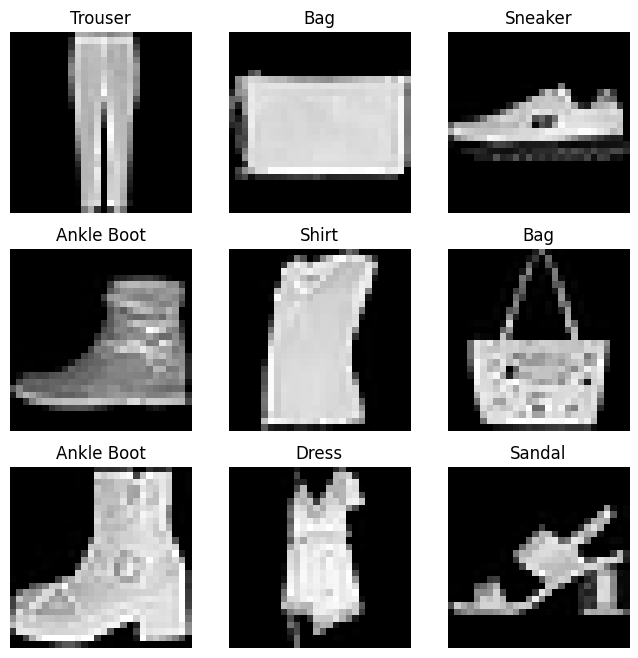

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Save and Load the Model
=======================

In this section we will look at how to persist model state with saving,
loading and running model predictions.


In [ ]:
import torch
import torchvision.models as models

Saving and Loading Model Weights
================================

PyTorch models store the learned parameters in an internal state
dictionary, called `state_dict`. These can be persisted via the
`torch.save` method:


In [ ]:
model = models.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), 'model_weights.pth')

To load model weights, you need to create an instance of the same model
first, and then load the parameters using `load_state_dict()` method.

In the code below, we set `weights_only=True` to limit the functions
executed during unpickling to only those necessary for loading weights.
Using `weights_only=True` is considered a best practice when loading
weights.


In [ ]:
model = models.vgg16() # we do not specify ``weights``, i.e. create untrained model
model.load_state_dict(torch.load('model_weights.pth', weights_only=True))
model.eval()

<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>

<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">

<p>be sure to call <code>model.eval()</code> method before inferencing to set the dropout and batch normalization layers to evaluation mode. Failing to do this will yield inconsistent inference results.</p>

</div>



Saving and Loading Models with Shapes
=====================================

When loading model weights, we needed to instantiate the model class
first, because the class defines the structure of a network. We might
want to save the structure of this class together with the model, in
which case we can pass `model` (and not `model.state_dict()`) to the
saving function:


In [ ]:
torch.save(model, 'model.pth')

We can then load the model as demonstrated below.

As described in [Saving and loading
torch.nn.Modules](https://pytorch.org/docs/main/notes/serialization.html#saving-and-loading-torch-nn-modules),
saving `state_dict` is considered the best practice. However, below we
use `weights_only=False` because this involves loading the model, which
is a legacy use case for `torch.save`.


In [ ]:
model = torch.load('model.pth', weights_only=False),

<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>

<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">

<p>This approach uses Python <a href="https://docs.python.org/3/library/pickle.html">pickle</a> module when serializing the model, thus it relies on the actual class definition to be available when loading the model.</p>

</div>

